# ***Part A***

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cols = [
    "Cement",
    "BlastFurnaceSlag",
    "FlyAsh",
    "Water",
    "Superplasticizer",
    "CoarseAggregate",
    "FineAggregate",
    "Age",
    "ConcreteCompressiveStrength"
]

df = pd.read_csv("concrete_data.csv", 
                 header=None,        
                 skiprows=1,    
                 names=cols,         
                 encoding="latin1")
print(df.head())

   Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age  ConcreteCompressiveStrength  
0          676.0   28                        79.99  
1          676.0   28                        61.89  
2          594.0  270                        40.27  
3          594.0  365                        41.05  
4          825.5  360                        44.30  


### ***Gradient Decent for Normalized Model***

In [17]:
features = [
    "Cement",
    "BlastFurnaceSlag",
    "FlyAsh",
    "Water",
    "Superplasticizer",
    "CoarseAggregate",
    "FineAggregate",
    "Age"
]

y = df["ConcreteCompressiveStrength"].values
normal_uni_train_mse = []
normal_uni_test_mse = []
normal_uni_train_r2 = []
normal_uni_test_r2 = []

For feature Cement:
Intercept (b) = 22.741, Slope (m) = 35.382
Train MSE: 203.527, Train R²: 0.265
Test MSE: 268.103, Test R²: -0.231
 


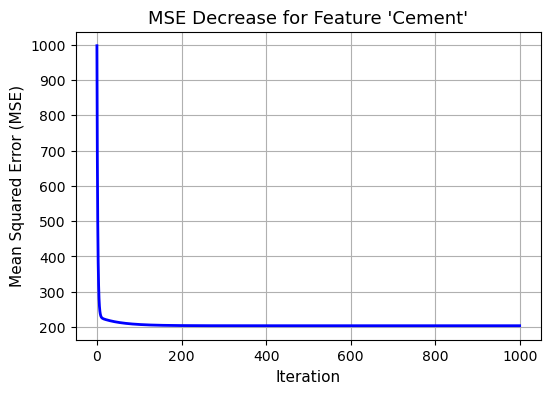

For feature BlastFurnaceSlag:
Intercept (b) = 34.595, Slope (m) = 11.219
Train MSE: 270.204, Train R²: 0.025
Test MSE: 309.086, Test R²: -0.420
 


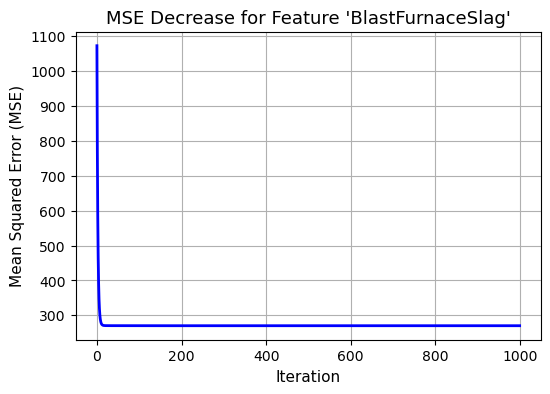

For feature FlyAsh:
Intercept (b) = 40.039, Slope (m) = -10.670
Train MSE: 265.349, Train R²: 0.042
Test MSE: 382.789, Test R²: -0.758
 


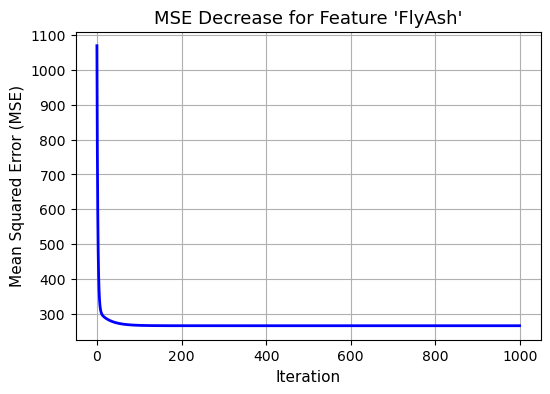

For feature Water:
Intercept (b) = 48.996, Slope (m) = -25.548
Train MSE: 256.049, Train R²: 0.076
Test MSE: 260.560, Test R²: -0.197
 


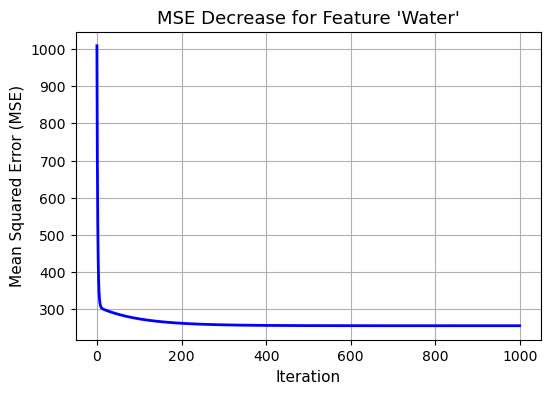

For feature Superplasticizer:
Intercept (b) = 30.913, Slope (m) = 28.407
Train MSE: 249.239, Train R²: 0.100
Test MSE: 195.716, Test R²: 0.101
 


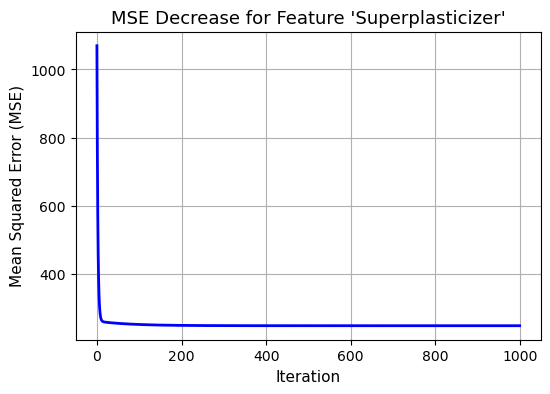

For feature CoarseAggregate:
Intercept (b) = 41.701, Slope (m) = -9.435
Train MSE: 272.549, Train R²: 0.016
Test MSE: 275.948, Test R²: -0.267
 


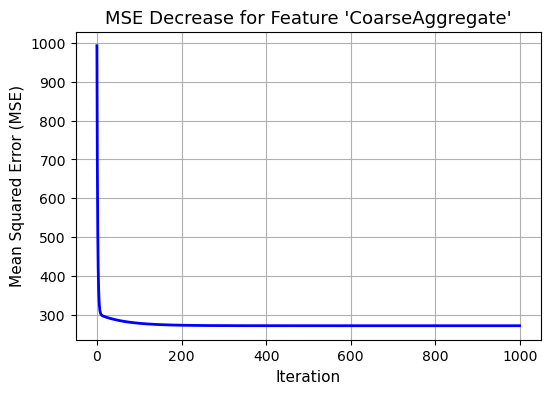

For feature FineAggregate:
Intercept (b) = 42.418, Slope (m) = -12.185
Train MSE: 270.792, Train R²: 0.023
Test MSE: 283.248, Test R²: -0.301
 


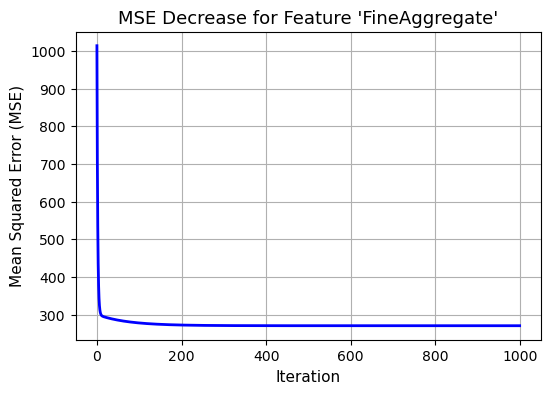

For feature Age:
Intercept (b) = 32.707, Slope (m) = 34.469
Train MSE: 243.191, Train R²: 0.122
Test MSE: 298.277, Test R²: -0.370
 


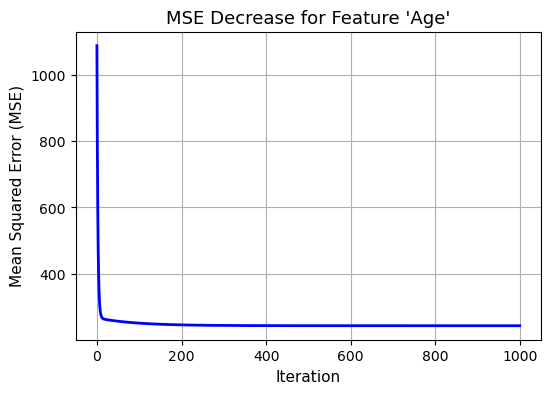

In [18]:
for feature in features:

    x = df[feature].values
    
    x_norm = (x - np.min(x)) / (np.max(x) - np.min(x))

    x_test = x_norm[501:631]
    y_test = y[501:631]
    x_train = np.concatenate((x_norm[:501], x_norm[631:]), axis=0)
    y_train = np.concatenate((y[:501], y[631:]), axis=0)
    n = len(y_train)

    w = np.array([1.0, 1.0])
    Learning_Rate = 0.1
    epoch = 1000

    y_pred = w[0] + w[1] * x_train
    f = np.mean((y_train - y_pred) ** 2)

    df_dw0 = (-2 / n) * np.sum(y_train - y_pred)
    df_dw1 = (-2 / n) * np.sum(x_train * (y_train - y_pred))
    f_gradient = np.array([df_dw0, df_dw1])

    mse_history = []
    
    for k in range(epoch):

        w = w - Learning_Rate * f_gradient

        y_pred = w[0] + w[1] * x_train
        f = np.mean((y_train - y_pred) ** 2)
        mse_history.append(f)

        df_dw0 = (-2 / n) * np.sum(y_train - y_pred)
        df_dw1 = (-2 / n) * np.sum(x_train * (y_train - y_pred))
        f_gradient = np.array([df_dw0, df_dw1])

    mse = np.mean((y_train - y_pred) ** 2)
    r2 = 1 - mse / np.var(y_train)

    normal_uni_train_mse.append(mse)
    normal_uni_train_r2.append(r2)

    print(f"For feature {feature}:")
    print(f"Intercept (b) = {w[0]:.3f}, Slope (m) = {w[1]:.3f}")
    print(f"Train MSE: {mse:.3f}, Train R²: {r2:.3f}")

    y_test_pred = w[0] + w[1] * x_test
    mse_test = np.mean((y_test - y_test_pred) ** 2)
    r2_test = 1 - mse_test / np.var(y_test)
    
    normal_uni_test_mse.append(mse_test)
    normal_uni_test_r2.append(r2_test)
    
    print(f"Test MSE: {mse_test:.3f}, Test R²: {r2_test:.3f}")
    print(" ")

    plt.figure(figsize=(6,4))
    plt.plot(mse_history, color='blue', linewidth=2)
    plt.title(f"MSE Decrease for Feature '{feature}'", fontsize=13)
    plt.xlabel("Iteration", fontsize=11)
    plt.ylabel("Mean Squared Error (MSE)", fontsize=11)
    plt.grid(True)
    plt.show()

### ***Gradient Decent for Untransformed Model***

In [19]:
Learning_Rate = np.array([1e-6, 1e-6, 1e-4, 1e-8, 1e-3, 1e-6, 1e-6, 1e-4])
index = 0
raw_uni_train_mse = []
raw_uni_test_mse = []
raw_uni_train_r2 = []
raw_uni_test_r2 = []

In [20]:
for feature in features:
    
    x = df[feature].values
    
    x_test = x[501:631]
    y_test = y[501:631]
    x_train = np.concatenate((x[:501], x[631:]), axis=0)
    y_train = np.concatenate((y[:501], y[631:]), axis=0)
    n = len(y_train)
    
    w = np.array([0.0, 0.0])
    learning_rate = Learning_Rate[index]
    epoch = 10000
    
    y_pred = w[0] + w[1] * x_train
    f = np.mean((y_train - y_pred) ** 2)
    
    df_dw0 = (-2 / n) * np.sum(y_train - y_pred)
    df_dw1 = (-2 / n) * np.sum(x_train * (y_train - y_pred))
    f_gradient = np.array([df_dw0, df_dw1])
    
    for k in range(epoch):
    
        w = w - learning_rate * f_gradient
    
        y_pred = w[0] + w[1] * x_train
        f = np.mean((y_train - y_pred) ** 2)
    
        df_dw0 = (-2 / n) * np.sum(y_train - y_pred)
        df_dw1 = (-2 / n) * np.sum(x_train * (y_train - y_pred))
        f_gradient = np.array([df_dw0, df_dw1])
    
    mse = np.mean((y_train - y_pred) ** 2)
    r2 = 1 - mse / np.var(y_train)

    raw_uni_train_mse.append(mse)
    raw_uni_train_r2.append(r2)
    
    print(f"For feature {feature}:")
    print(f"Intercept (b) = {w[0]:.3f}, Slope (m) = {w[1]:.3f}")
    print(f"Train MSE: {mse:.3f}, Train R²: {r2:.3f}")
    
    y_test_pred = w[0] + w[1] * x_test
    mse_test = np.mean((y_test - y_test_pred) ** 2)
    r2_test = 1 - mse_test / np.var(y_test)

    raw_uni_test_mse.append(mse_test)
    raw_uni_test_r2.append(r2_test)
    
    print(f"Test MSE: {mse_test:.3f}, Test R²: {r2_test:.3f}")
    print(" ")
    index += 1

For feature Cement:
Intercept (b) = 0.037, Slope (m) = 0.126
Train MSE: 230.125, Train R²: 0.169
Test MSE: 256.765, Test R²: -0.179
 
For feature BlastFurnaceSlag:
Intercept (b) = 0.379, Slope (m) = 0.234
Train MSE: 912.960, Train R²: -2.295
Test MSE: 1003.923, Test R²: -3.611
 
For feature FlyAsh:
Intercept (b) = 26.845, Slope (m) = 0.049
Train MSE: 361.970, Train R²: -0.306
Test MSE: 185.021, Test R²: 0.150
 
For feature Water:
Intercept (b) = 0.001, Slope (m) = 0.198
Train MSE: 338.383, Train R²: -0.221
Test MSE: 332.426, Test R²: -0.527
 
For feature Superplasticizer:
Intercept (b) = 30.901, Slope (m) = 0.884
Train MSE: 249.239, Train R²: 0.100
Test MSE: 195.578, Test R²: 0.102
 
For feature CoarseAggregate:
Intercept (b) = 0.008, Slope (m) = 0.038
Train MSE: 298.127, Train R²: -0.076
Test MSE: 344.241, Test R²: -0.581
 
For feature FineAggregate:
Intercept (b) = 0.014, Slope (m) = 0.047
Train MSE: 311.630, Train R²: -0.125
Test MSE: 332.944, Test R²: -0.529
 
For feature Age:
Inte

### ***Multivariate Linear Models Code Tests 1***

In [21]:
x = [3, 4, 5]
y = 4
n = 1

w = np.array([1.0, 1.0, 1.0, 1.0])
Learning_Rate = 0.1
epoch = 1

y_pred = w[0] + w[1] * x[0] + w[2] * x[1] + w[3] * x[2]
f = np.mean((y - y_pred) ** 2)

df_dw0 = (-2 / n) * np.sum(y - y_pred)
df_dw1 = (-2 / n) * np.sum(x[0] * (y - y_pred))
df_dw2 = (-2 / n) * np.sum(x[1] * (y - y_pred))
df_dw3 = (-2 / n) * np.sum(x[2] * (y - y_pred))
f_gradient = np.array([df_dw0, df_dw1, df_dw2, df_dw3])

for k in range(epoch):

    w = w - Learning_Rate * f_gradient

    y_pred = w[0] + w[1] * x[0] + w[2] * x[1] + w[3] * x[2]
    f = np.mean((y - y_pred) ** 2)

    df_dw0 = (-2 / n) * np.sum(y - y_pred)
    df_dw1 = (-2 / n) * np.sum(x[0] * (y - y_pred))
    df_dw2 = (-2 / n) * np.sum(x[1] * (y - y_pred))
    df_dw3 = (-2 / n) * np.sum(x[2] * (y - y_pred))
    f_gradient = np.array([df_dw0, df_dw1, df_dw2, df_dw3])


print(w)

[-0.8 -4.4 -6.2 -8. ]


### ***Multivariate Linear Models Code Tests 2***

In [22]:
x1 = np.array([3, 4, 10, 3, 11])
x2 = np.array([4,2,2,4,1])
x3 = np.array([4,1,5,5,1])
y = np.array([3,2,8,4,5])
n = len(y)

w = np.array([1.0, 1.0, 1.0, 1.0])
Learning_Rate = 0.1
epoch = 1

y_pred = w[0] + w[1] * x1 + w[2] * x2 + w[3] * x3
f = np.mean((y - y_pred) ** 2)

df_dw0 = (-2 / n) * np.sum(y - y_pred)
df_dw1 = (-2 / n) * np.sum(x1 * (y - y_pred))
df_dw2 = (-2 / n) * np.sum(x2 * (y - y_pred))
df_dw3 = (-2 / n) * np.sum(x3 * (y - y_pred))
f_gradient = np.array([df_dw0, df_dw1, df_dw2, df_dw3])

for k in range(epoch):

    w = w - Learning_Rate * f_gradient

    y_pred = w[0] + w[1] * x1 + w[2] * x2 + w[3] * x3
    f = np.mean((y - y_pred) ** 2)

    df_dw0 = (-2 / n) * np.sum(y - y_pred)
    df_dw1 = (-2 / n) * np.sum(x1 * (y - y_pred))
    df_dw2 = (-2 / n) * np.sum(x2 * (y - y_pred))
    df_dw3 = (-2 / n) * np.sum(x3 * (y - y_pred))
    f_gradient = np.array([df_dw0, df_dw1, df_dw2, df_dw3])


print(w)

[ -0.72 -10.08  -3.52  -4.84]


### ***Multivariate Linear Models (Normalized)***

In [38]:
x = df.drop("ConcreteCompressiveStrength", axis=1)
y = df["ConcreteCompressiveStrength"].values
n_total = len(y)

x_norm = (x - x.min()) / (x.max() - x.min())

x_test = x_norm.iloc[501:631, :]
y_test = y[501:631]
x_train = pd.concat([x_norm.iloc[:501, :], x_norm.iloc[631:, :]], axis=0)
y_train = np.concatenate([y[:501], y[631:]])
n = len(y_train)

w = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
Learning_Rate = 0.01
epoch = 5000
mse_history_normalized = []

for k in range(epoch):
    y_pred = (
        w[0]
        + w[1] * x_train["Cement"]
        + w[2] * x_train["BlastFurnaceSlag"]
        + w[3] * x_train["FlyAsh"]
        + w[4] * x_train["Water"]
        + w[5] * x_train["Superplasticizer"]
        + w[6] * x_train["CoarseAggregate"]
        + w[7] * x_train["FineAggregate"]
        + w[8] * x_train["Age"]
    )

    df_dw0 = (-2 / n) * np.sum(y_train - y_pred)
    df_dw1 = (-2 / n) * np.sum(x_train["Cement"] * (y_train - y_pred))
    df_dw2 = (-2 / n) * np.sum(x_train["BlastFurnaceSlag"] * (y_train - y_pred))
    df_dw3 = (-2 / n) * np.sum(x_train["FlyAsh"] * (y_train - y_pred))
    df_dw4 = (-2 / n) * np.sum(x_train["Water"] * (y_train - y_pred))
    df_dw5 = (-2 / n) * np.sum(x_train["Superplasticizer"] * (y_train - y_pred))
    df_dw6 = (-2 / n) * np.sum(x_train["CoarseAggregate"] * (y_train - y_pred))
    df_dw7 = (-2 / n) * np.sum(x_train["FineAggregate"] * (y_train - y_pred))
    df_dw8 = (-2 / n) * np.sum(x_train["Age"] * (y_train - y_pred))
    f_gradient = np.array([
        df_dw0, df_dw1, df_dw2, df_dw3, df_dw4, df_dw5, df_dw6, df_dw7, df_dw8
    ])

    w = w - Learning_Rate * f_gradient
    f = np.mean((y_train - y_pred) ** 2)
    mse_history_normalized.append(f)

y_pred = (
    w[0]
    + w[1] * x_train["Cement"]
    + w[2] * x_train["BlastFurnaceSlag"]
    + w[3] * x_train["FlyAsh"]
    + w[4] * x_train["Water"]
    + w[5] * x_train["Superplasticizer"]
    + w[6] * x_train["CoarseAggregate"]
    + w[7] * x_train["FineAggregate"]
    + w[8] * x_train["Age"]
)
normal_mul_train_mse = np.mean((y_train - y_pred) ** 2)
normal_mul_train_r2 = 1 - mse / np.var(y_train)

print(f"Intercept (b) = {w[0]:.3f}")
print(f"Slope1 (Cement) = {w[1]:.3f}")
print(f"Slope2 (BlastFurnaceSlag) = {w[2]:.3f}")
print(f"Slope3 (FlyAsh) = {w[3]:.3f}")
print(f"Slope4 (Water) = {w[4]:.3f}")
print(f"Slope5 (Superplasticizer) = {w[5]:.3f}")
print(f"Slope6 (CoarseAggregate) = {w[6]:.3f}")
print(f"Slope7 (FineAggregate) = {w[7]:.3f}")
print(f"Slope8 (Age) = {w[8]:.3f}")
print(f"Training MSE: {normal_mul_train_mse:.3f}, R²: {normal_mul_train_r2:.3f}")

y_test_pred = (
    w[0]
    + w[1] * x_test["Cement"]
    + w[2] * x_test["BlastFurnaceSlag"]
    + w[3] * x_test["FlyAsh"]
    + w[4] * x_test["Water"]
    + w[5] * x_test["Superplasticizer"]
    + w[6] * x_test["CoarseAggregate"]
    + w[7] * x_test["FineAggregate"]
    + w[8] * x_test["Age"]
)
normal_mul_test_mse = np.mean((y_test - y_test_pred) ** 2)
normal_mul_test_r2 = 1 - mse_test / np.var(y_test)

print(f"Test MSE: {normal_mul_test_mse:.3f}, Test R²: {normal_mul_test_r2:.3f}")

Intercept (b) = 14.377
Slope1 (Cement) = 39.269
Slope2 (BlastFurnaceSlag) = 25.429
Slope3 (FlyAsh) = 7.053
Slope4 (Water) = -19.262
Slope5 (Superplasticizer) = 16.837
Slope6 (CoarseAggregate) = 2.103
Slope7 (FineAggregate) = -1.864
Slope8 (Age) = 37.646
Training MSE: 109.612, R²: -0.068
Test MSE: 119.820, Test R²: -0.358


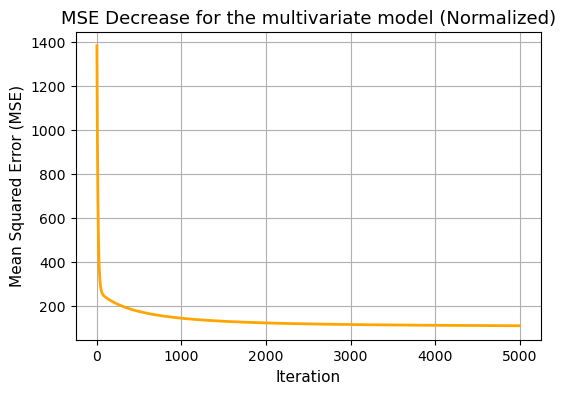

In [40]:
plt.figure(figsize=(6,4))
plt.plot(mse_history_normalized, color='orange', linewidth=2)
plt.title(f"MSE Decrease for the multivariate model (Normalized)", fontsize=13)
plt.xlabel("Iteration", fontsize=11)
plt.ylabel("Mean Squared Error (MSE)", fontsize=11)
plt.grid(True)
plt.show()

### ***Multivariate Linear Models (Raw)***

In [42]:
x = df.drop("ConcreteCompressiveStrength", axis=1)
y = df["ConcreteCompressiveStrength"].values
n_total = len(y)

x_test = x.iloc[501:631, :]
y_test = y[501:631]
x_train = pd.concat([x.iloc[:501, :], x.iloc[631:, :]], axis=0)
y_train = np.concatenate([y[:501], y[631:]])
n = len(y_train)

w = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
Learning_Rate = 1e-7
epoch = 10000
mse_history_raw = []

for k in range(epoch):
    y_pred = (
        w[0]
        + w[1] * x_train["Cement"]
        + w[2] * x_train["BlastFurnaceSlag"]
        + w[3] * x_train["FlyAsh"]
        + w[4] * x_train["Water"]
        + w[5] * x_train["Superplasticizer"]
        + w[6] * x_train["CoarseAggregate"]
        + w[7] * x_train["FineAggregate"]
        + w[8] * x_train["Age"]
    )

    df_dw0 = (-2 / n) * np.sum(y_train - y_pred)
    df_dw1 = (-2 / n) * np.sum(x_train["Cement"] * (y_train - y_pred))
    df_dw2 = (-2 / n) * np.sum(x_train["BlastFurnaceSlag"] * (y_train - y_pred))
    df_dw3 = (-2 / n) * np.sum(x_train["FlyAsh"] * (y_train - y_pred))
    df_dw4 = (-2 / n) * np.sum(x_train["Water"] * (y_train - y_pred))
    df_dw5 = (-2 / n) * np.sum(x_train["Superplasticizer"] * (y_train - y_pred))
    df_dw6 = (-2 / n) * np.sum(x_train["CoarseAggregate"] * (y_train - y_pred))
    df_dw7 = (-2 / n) * np.sum(x_train["FineAggregate"] * (y_train - y_pred))
    df_dw8 = (-2 / n) * np.sum(x_train["Age"] * (y_train - y_pred))
    f_gradient = np.array([
        df_dw0, df_dw1, df_dw2, df_dw3, df_dw4, df_dw5, df_dw6, df_dw7, df_dw8
    ])

    w = w - Learning_Rate * f_gradient
    f = np.mean((y_train - y_pred) ** 2)
    mse_history_raw.append(f)

y_pred = (
    w[0]
    + w[1] * x_train["Cement"]
    + w[2] * x_train["BlastFurnaceSlag"]
    + w[3] * x_train["FlyAsh"]
    + w[4] * x_train["Water"]
    + w[5] * x_train["Superplasticizer"]
    + w[6] * x_train["CoarseAggregate"]
    + w[7] * x_train["FineAggregate"]
    + w[8] * x_train["Age"]
)
raw_mul_train_mse = np.mean((y_train - y_pred) ** 2)
raw_mul_train_r2 = 1 - mse / np.var(y_train)

print(f"Intercept (b) = {w[0]:.3f}")
print(f"Slope1 (Cement) = {w[1]:.3f}")
print(f"Slope2 (BlastFurnaceSlag) = {w[2]:.3f}")
print(f"Slope3 (FlyAsh) = {w[3]:.3f}")
print(f"Slope4 (Water) = {w[4]:.3f}")
print(f"Slope5 (Superplasticizer) = {w[5]:.3f}")
print(f"Slope6 (CoarseAggregate) = {w[6]:.3f}")
print(f"Slope7 (FineAggregate) = {w[7]:.3f}")
print(f"Slope8 (Age) = {w[8]:.3f}")
print(f"Training MSE: {raw_mul_train_mse:.3f}, R²: {raw_mul_train_r2:.3f}")

y_test_pred = (
    w[0]
    + w[1] * x_test["Cement"]
    + w[2] * x_test["BlastFurnaceSlag"]
    + w[3] * x_test["FlyAsh"]
    + w[4] * x_test["Water"]
    + w[5] * x_test["Superplasticizer"]
    + w[6] * x_test["CoarseAggregate"]
    + w[7] * x_test["FineAggregate"]
    + w[8] * x_test["Age"]
)
raw_mul_test_mse = np.mean((y_test - y_test_pred) ** 2)
raw_mul_test_r2 = 1 - mse_test / np.var(y_test)

print(f"Test MSE: {raw_mul_test_mse:.3f}, Test R²: {raw_mul_test_r2:.3f}")

Intercept (b) = 0.997
Slope1 (Cement) = 0.092
Slope2 (BlastFurnaceSlag) = 0.062
Slope3 (FlyAsh) = 0.050
Slope4 (Water) = 0.064
Slope5 (Superplasticizer) = 0.933
Slope6 (CoarseAggregate) = -0.011
Slope7 (FineAggregate) = -0.011
Slope8 (Age) = 0.094
Training MSE: 137.115, R²: -0.068
Test MSE: 107.160, Test R²: -0.358


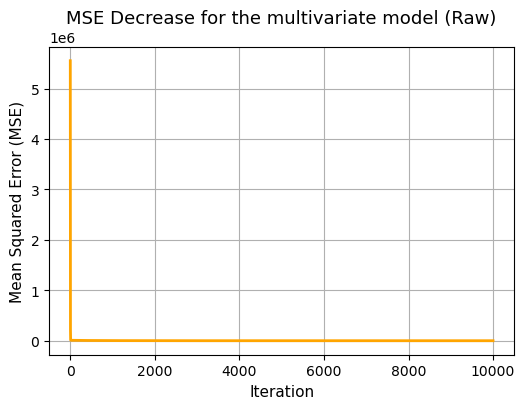

In [46]:
plt.figure(figsize=(6,4))
plt.plot(mse_history_raw, color='orange', linewidth=2)
plt.title(f"MSE Decrease for the multivariate model (Raw)", fontsize=13)
plt.xlabel("Iteration", fontsize=11)
plt.ylabel("Mean Squared Error (MSE)", fontsize=11)
plt.grid(True)
plt.show()

### ***Gradient Descent Results Sum Up***

In [25]:
uni_data = {
    "Train_MSE": normal_uni_train_mse,
    "Test_MSE": normal_uni_test_mse,
    "Train_R2": normal_uni_train_r2,
    "Test_R2": normal_uni_test_r2,
    "Raw_Train_MSE": raw_uni_train_mse,
    "Raw_Test_MSE": raw_uni_test_mse,
    "Raw_Train_R2": raw_uni_train_r2,
    "Raw_Test_R2": raw_uni_test_r2
}

uni_df = pd.DataFrame(uni_data, index=features)

multi_data = {
    "Train_MSE": [normal_mul_train_mse],
    "Test_MSE": [normal_mul_test_mse],
    "Train_R2": [normal_mul_train_r2],
    "Test_R2": [normal_mul_test_r2],
    "Raw_Train_MSE": [raw_mul_train_mse],
    "Raw_Test_MSE": [raw_mul_test_mse],
    "Raw_Train_R2": [raw_mul_train_r2],
    "Raw_Test_R2": [raw_mul_test_r2]
}

multi_df = pd.DataFrame(multi_data, index=["Multivariate"])

results_df = pd.concat([uni_df, multi_df])
print(results_df.round(3))

                  Train_MSE  Test_MSE  Train_R2  Test_R2  Raw_Train_MSE  \
Cement              203.527   268.103     0.265   -0.231        230.125   
BlastFurnaceSlag    270.204   309.086     0.025   -0.420        912.960   
FlyAsh              265.349   382.789     0.042   -0.758        361.970   
Water               256.049   260.560     0.076   -0.197        338.383   
Superplasticizer    249.239   195.716     0.100    0.101        249.239   
CoarseAggregate     272.549   275.948     0.016   -0.267        298.127   
FineAggregate       270.792   283.248     0.023   -0.301        311.630   
Age                 243.191   298.277     0.122   -0.370        295.860   
Multivariate        109.612   119.820    -0.068   -0.358        137.115   

                  Raw_Test_MSE  Raw_Train_R2  Raw_Test_R2  
Cement                 256.765         0.169       -0.179  
BlastFurnaceSlag      1003.923        -2.295       -3.611  
FlyAsh                 185.021        -0.306        0.150  
Water    

In [31]:
uni_df

,Train_MSE,Test_MSE,Train_R2,Test_R2,Raw_Train_MSE,Raw_Test_MSE,Raw_Train_R2,Raw_Test_R2
Cement,203.527354,268.103168,0.265457,-0.231304,230.125256,256.764876,0.169464,-0.179231
BlastFurnaceSlag,270.204129,309.086238,0.024817,-0.419525,912.959997,1003.923304,-2.294929,-3.610669
FlyAsh,265.348821,382.789301,0.042340,-0.758017,361.970213,185.020637,-0.306373,0.150265
Water,256.049064,260.560238,0.075903,-0.196662,338.383025,332.425764,-0.221245,-0.526715
Superplasticizer,249.238843,195.715875,0.100482,0.101145,249.238833,195.577990,0.100482,0.101779
CoarseAggregate,272.549161,275.948287,0.016353,-0.267334,298.126680,344.240687,-0.075958,-0.580977
FineAggregate,270.792040,283.247757,0.022695,-0.300858,311.630289,332.944053,-0.124693,-0.529096
Age,243.190864,298.277344,0.122309,-0.369884,295.859659,295.639905,-0.067776,-0.357771


In [32]:
multi_df

,Train_MSE,Test_MSE,Train_R2,Test_R2,Raw_Train_MSE,Raw_Test_MSE,Raw_Train_R2,Raw_Test_R2
Multivariate,109.611735,119.819554,-0.067776,-0.357771,137.115217,107.160285,-0.067776,-0.357771


### ***R_Squared***

In [26]:
r_squared_normalized = [0.265, 0.025, 0.042, 0.076, 0.100, 0.016, 0.023, 0.122]
r_squared_raw = [0.169, -2.295, -0.306, -0.221, 0.100, -0.076, -0.125, -0.068]

In [27]:
features = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 
            'Superplasticizer', 'CoarseAgg', 'FineAgg', 'Age']

x = np.arange(len(features))

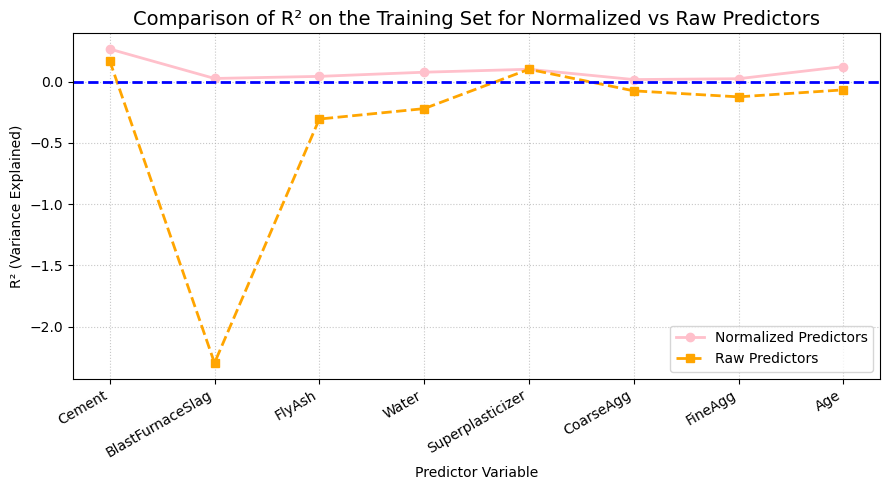

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(x, r_squared_normalized, color = 'pink', marker='o', label='Normalized Predictors', linewidth=2)
plt.plot(x, r_squared_raw, marker='s', color = 'orange', label='Raw Predictors', linewidth=2, linestyle='--')

plt.title('Comparison of R² on the Training Set for Normalized vs Raw Predictors', fontsize=14)
plt.xticks(x, features, rotation=30, ha='right')
plt.xlabel('Predictor Variable')
plt.ylabel('R² (Variance Explained)')
plt.axhline(0, color='blue', linewidth=2, linestyle='--')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

### ***Regression Plots for 3 strongest Factors***

In [29]:
x1 = df['Cement']
x2 = df['Water']
x3 = df['Age']
y = df['ConcreteCompressiveStrength']

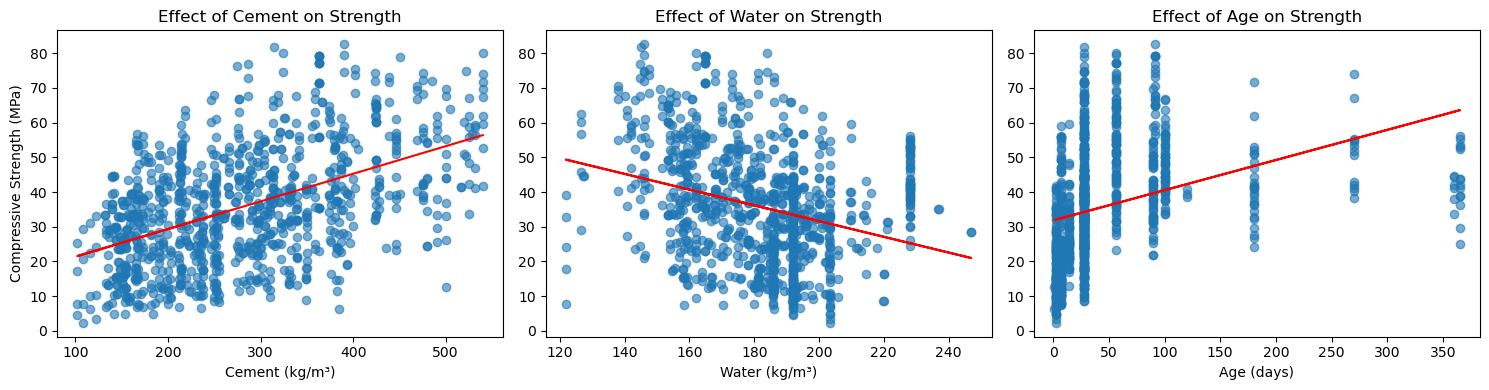

In [30]:
x1 = df['Cement']
x2 = df['Water']
x3 = df['Age']
y = df['ConcreteCompressiveStrength']


fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(x1, y, alpha=0.6)
m1, b1 = np.polyfit(x1, y, 1)
axes[0].plot(x1, m1*x1 + b1, color='red')
axes[0].set_title('Effect of Cement on Strength')
axes[0].set_xlabel('Cement (kg/m³)')
axes[0].set_ylabel('Compressive Strength (MPa)')

axes[1].scatter(x2, y, alpha=0.6)
m2, b2 = np.polyfit(x2, y, 1)
axes[1].plot(x2, m2*x2 + b2, color='red')
axes[1].set_title('Effect of Water on Strength')
axes[1].set_xlabel('Water (kg/m³)')
axes[1].set_ylabel('')

axes[2].scatter(x3, y, alpha=0.6)
m3, b3 = np.polyfit(x3, y, 1)
axes[2].plot(x3, m3*x3 + b3, color='red')
axes[2].set_title('Effect of Age on Strength')
axes[2].set_xlabel('Age (days)')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()